## Import the CSV Dataset to python and clean the original data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
#import dataset, assign a name "thesis"
thesis = pd.read_csv(r"C:\Users\lilyp\Desktop\Desktop\Data Thesis\Original_data_to_redo.csv", index_col = "Unnamed: 0")

#set index
thesis.index.names = ["Person"]
thesis = thesis.drop("Custom Data 1", axis =1)

#Fix typo mistakes and inconsistencies 
thesis.replace(['Viet Nam','Zimbabwe 🇿🇼', 'Shool 8'], ['Vietnam', 'Zimbabwe', 'School 8'], inplace= True)
thesis['What country do you regard as your home country?']= thesis['What country do you regard as your home country?'].str.strip()
thesis['Where do your parents live?'] = thesis['Where do your parents live?'].str.strip()
thesis['Where do your parents live?'].replace('Zimbabwe 🇿🇼', 'Zimbabwe', inplace = True)
thesis['What type of visa do you hold to be in China?'] = thesis['What type of visa do you hold to be in China?'].str.replace('Student visa ','Student Visa')
thesis['How long have you lived in China?'] = thesis['How long have you lived in China?'].replace(['<1 year ', '1 year ', '1 years', '2 years ', '3 years ', '4 years ','4years', '>4years'],  ['<1 year', '1 year', '1 year', '2 years','3 years',   '4 years',  '4 years', '>4 years' ])

# Delete columns with less than 75% responses/more than 25% null values
## (if columns is one of these ['Open-Ended Response', 'Response', 'Other (please specify)', 'Please specify'])
response_list = ['Open-Ended Response', 'Response', 'Other (please specify)', 'Please specify']
for col_name in list(thesis.columns):
    second_row_from_top = thesis[col_name][0]
    if second_row_from_top in response_list:
        null_value = thesis[col_name].isna().sum()
        null_percentage = null_value *100/ (len(thesis[col_name])-1) 
        if null_percentage > 25:
            thesis.drop(columns = col_name, inplace = True)

## Merge Likert Scale columns

In [32]:
# Extract Likert Scale data
likert_scale = thesis[['Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.1',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.2',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.3',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.4',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.5',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.6',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.7',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.8',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.9',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.10',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.11',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.12',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.13',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.14',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.15',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.16',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.17',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.18',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.19',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.20',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.21',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.22',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.23',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.24',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.25',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.26',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.27',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.28',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.29',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.30',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.31',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.32',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.33',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.34',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.35',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.36',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.37',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.38',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.39',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.40',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.41',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.42',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.43',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.44',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.45',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.46',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.47',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.48',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.49',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.50',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.51',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.52',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.53',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.54',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.55',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.56',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.57',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.58',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.59',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.60',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.61',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.62',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.63',
       'Please indicate your perception of the following factors. This is to compare your perceptions of your home country and China.64']]

In [33]:
# Combine Likert Scale columns
compared_criteria = list(likert_scale.iloc[0])
compared_criteria
#only get the part before the "-" in the column names
criteria_list = []
for criteria in compared_criteria:
    criteria = criteria.split("-")[0] 
    criteria_list.append(criteria) 
likert_scale.columns = criteria_list

#group by first row/heading row, horizontally, combined them
combined_likert_scale = likert_scale.groupby(level=0, axis=1).sum() 

# Likert Scale question: Drop rows with values = 0/nan
combined_likert_scale= combined_likert_scale[combined_likert_scale.loc[:]!=0].dropna().drop(index=0, axis =0)

## Visualize Likert scale questions

In [34]:
# BOTH STAY AND GO HOME
# Create 1 stacked bar chart for all likert scale questions
#### https://www.youtube.com/watch?v=oiITOShYIkA

#fix typo in a column
combined_likert_scale['Racial discrimination situation '] = combined_likert_scale['Racial discrimination situation '].replace('Much better at homeSame','Much better at home')

# export to excel file to do t-test later
combined_likert_scale.to_excel("ttest_likert.xlsx")

# determine the frequencies of each variable
combined_likert_scale.columns
frequencies = {}
for i in combined_likert_scale.columns:
    frequencies[i] = combined_likert_scale[i].value_counts()
visualize_likert = pd.DataFrame(frequencies).transpose() #turn 90 degree clockwise

# get percentage of each rows 
visualize_likert= visualize_likert.div(visualize_likert.sum(axis =1), axis =0)*100
visualize_likert = visualize_likert[['Much better at home', 'Slightly better at home', 'Same', 'Slightly better in China','Much better in China']]

# Create 1 stacked bar charts for all likert scale questions + add one row of total portion of people who chose to stay or go home at the top 

#make a copy of processed likert scale questions
likert_copy= combined_likert_scale.copy(deep=True)
likert_scale_columns = ['Access to healthcare facilities ', 'Access to recreation facilities ',
       'Air quality ', 'Educational opportunities for children ',
       'Gender equality ', 'Job opportunities ',
       'Level of political stability ', 'Level of public security ',
       'Opportunities to advance your career ',
       'Racial discrimination situation ', 'Standard of living ',
       'Starting salary after completing your studies ', 'Water quality ']
# join with column [Do you want to stay or leave]
likert_copy = likert_copy.merge(thesis['Do you plan to stay and work in China or go home after your graduation?'], left_index = True, right_index = True)

# STAY
#choose only rows with PEOPLE WHO STAYS
likert_copy_stay = likert_copy[likert_copy['Do you plan to stay and work in China or go home after your graduation?']=="Stay and work in China"]
likert_copy_stay.head(3)
#determine the frequencies of each variable
frequencies = {}
for i in likert_scale_columns:
    frequencies[i] = likert_copy_stay[i].value_counts()
visualize_likert_stay = pd.DataFrame(frequencies).transpose()#.fillna(0) #turn 90 degree clockwise
visualize_likert_stay = visualize_likert_stay.loc[:,['Much better at home', 'Slightly better at home', 'Same', 'Slightly better in China','Much better in China']]

visualize_likert_stay.loc['Total-Stay'] = visualize_likert_stay.sum(axis=0)
# calculate percentage of each value in each column
sumlikert_stay = visualize_likert_stay.div(visualize_likert_stay.sum(axis =1), axis =0)*100

# GO HOME
#choose only rows with PEOPLE WHO GOES HOME
likert_copy_leave = likert_copy[likert_copy['Do you plan to stay and work in China or go home after your graduation?']=="Go home"]
likert_copy_leave.head(3)

#determine the frequencies of each variable
frequencies = {}
for i in likert_scale_columns:
    frequencies[i] = likert_copy_leave[i].value_counts()
visualize_likert_leave = pd.DataFrame(frequencies).transpose() #turn 90 degree clockwise
visualize_likert_leave= visualize_likert_leave.div(visualize_likert_leave.sum(axis =1), axis =0)*100
visualize_likert_leave = visualize_likert_leave.loc[:,['Much better at home', 'Slightly better at home', 'Same', 'Slightly better in China','Much better in China']]

visualize_likert_leave.loc['Total-Go Home'] = visualize_likert_leave.sum(axis=0)

sumlikert_leave = visualize_likert_leave.div(visualize_likert_leave.sum(axis =1), axis =0)*100
sumlikert_leave

,Much better at home,Slightly better at home,Same,Slightly better in China,Much better in China
Access to healthcare facilities,20.000000,17.777778,22.222222,24.444444,15.555556
Access to recreation facilities,11.111111,15.555556,28.888889,15.555556,28.888889
Air quality,62.222222,11.111111,8.888889,8.888889,8.888889
Educational opportunities for children,13.333333,11.111111,20.000000,35.555556,20.000000
Gender equality,8.888889,11.111111,55.555556,17.777778,6.666667
Job opportunities,8.888889,2.222222,31.111111,26.666667,31.111111
Level of political stability,6.666667,6.666667,26.666667,31.111111,28.888889
Level of public security,6.666667,6.666667,20.000000,28.888889,37.777778
Opportunities to advance your career,11.111111,6.666667,24.444444,37.777778,20.000000
Racial discrimination situation,28.888889,24.444444,33.333333,11.111111,2.222222


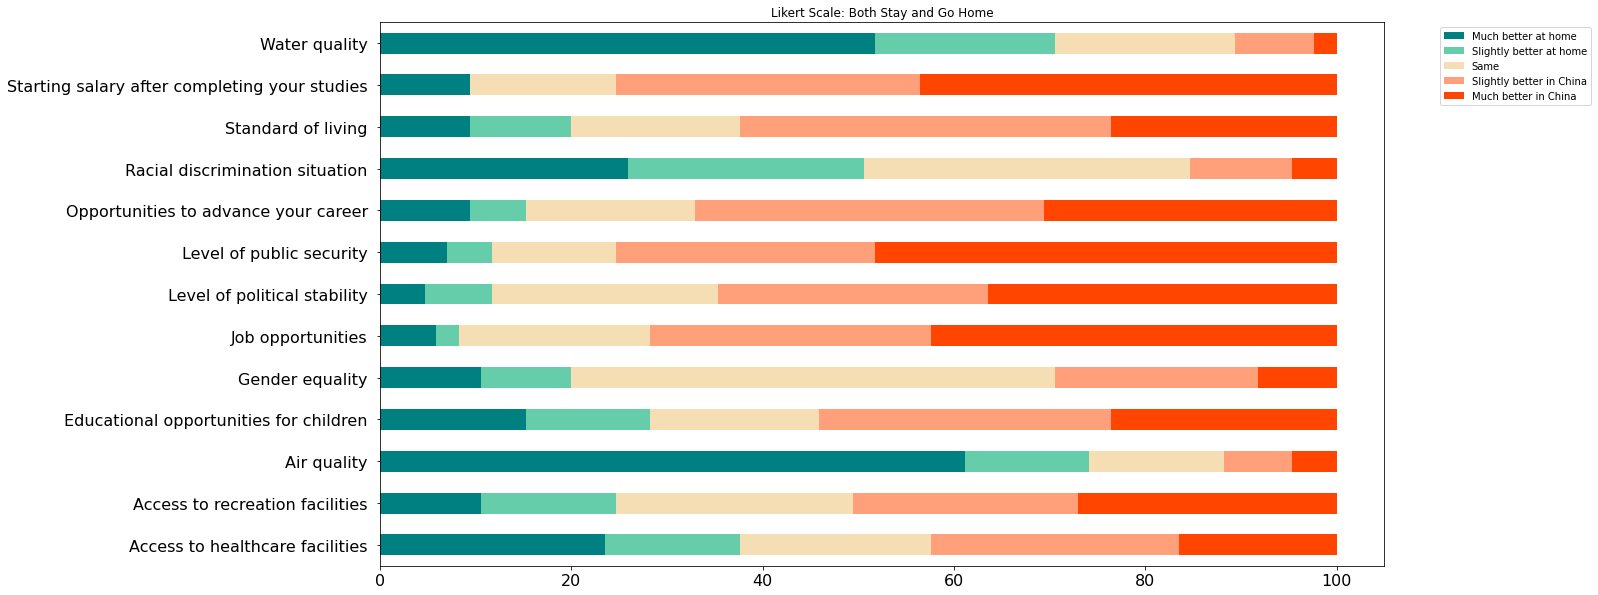

In [35]:
#Visualize the percentage of respondents who chose to stay AND go home for all Likert scale questions
colors = ['teal', 'mediumaquamarine', 'wheat', 'lightsalmon', 'orangered']
visualize_likert.plot(kind = "barh", stacked = True, figsize = (18, 10), fontsize = 16, color = colors, title = "Likert Scale: Both Stay and Go Home")
plt.legend(bbox_to_anchor = (1.05, 1))

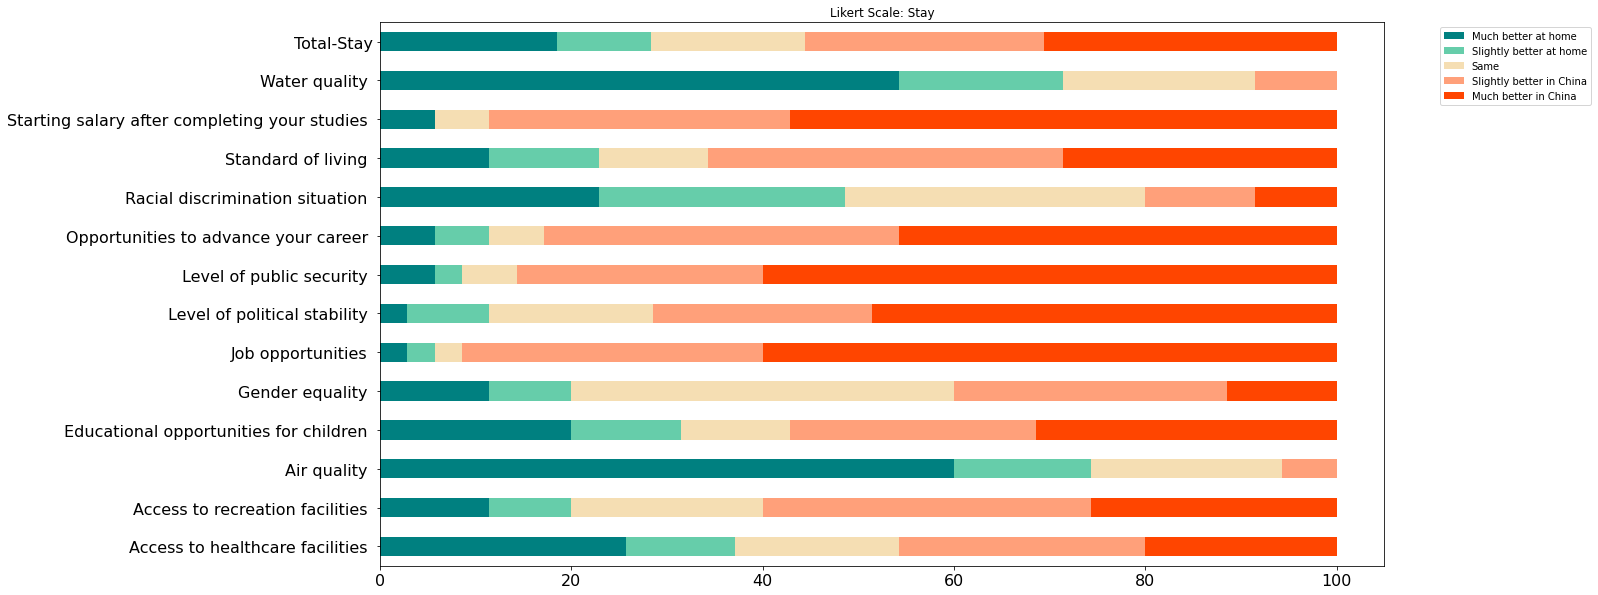

In [36]:
# visualize likert scale questions for people who choose to stay
colors = ['teal', 'mediumaquamarine', 'wheat', 'lightsalmon', 'orangered']
sumlikert_stay.plot(kind = "barh", stacked = True, figsize = (18, 10), fontsize = 16, color= colors, title = "Likert Scale: Stay")
plt.legend(bbox_to_anchor = (1.05, 1))

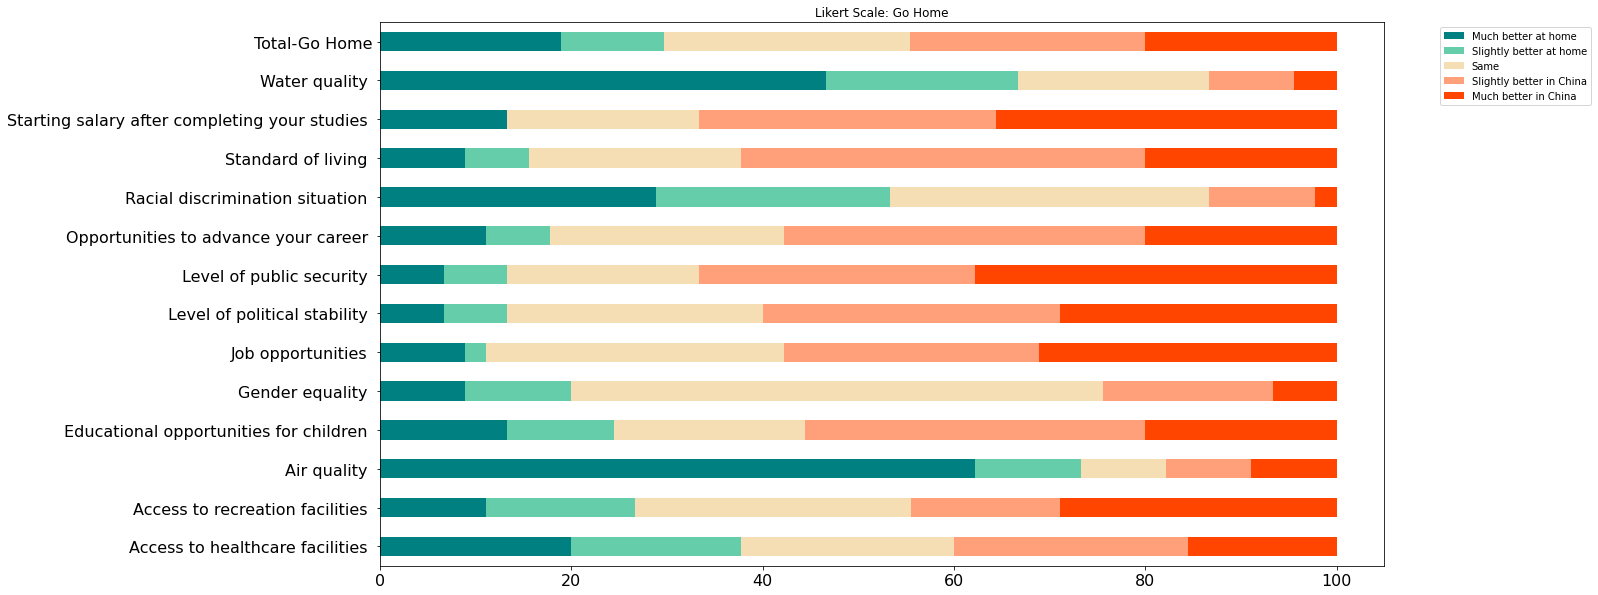

In [37]:
# visualize likert scale questions for people who choose to go home

colors = ['teal', 'mediumaquamarine', 'wheat', 'lightsalmon', 'orangered']
sumlikert_leave.plot(kind = "barh", stacked = True, figsize = (18, 10), fontsize = 16, color = colors, title = "Likert Scale: Go Home")
plt.legend(bbox_to_anchor = (1.05, 1))

## Concat 2 dataframes - all the likert scale questions/criteria for stay and leave are on top of each other
#### Each criterion: 2 rows (stay and go home)
##### Each bar graph is the summary of each likert scale (much better, slightly better...) for all Likert criteria 

In [38]:
#Concat 2 dataframes
sumlikert_stay['StayOrLeave'] = 'Stay'

sumlikert_leave['StayOrLeave'] = 'Go Home'

concat_stayorleave = pd.concat([sumlikert_stay.iloc[:-1],sumlikert_leave.iloc[:-1]], ignore_index=False)
concat_stayorleave = concat_stayorleave.sort_index(ascending = True)
concat_stayorleave_index = concat_stayorleave.index.unique()

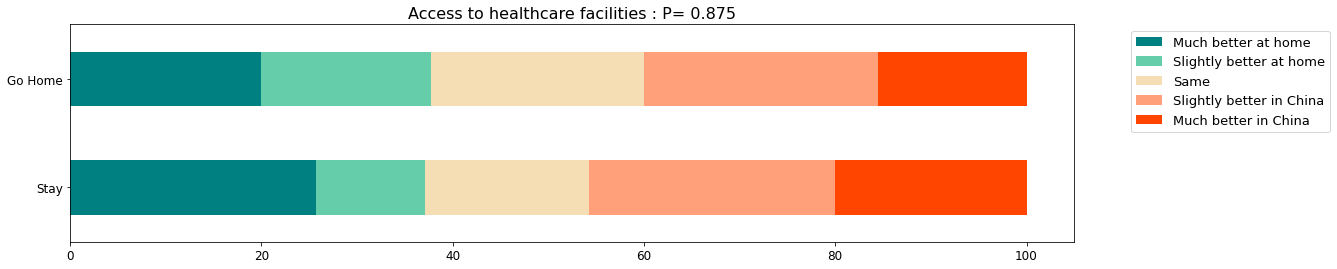

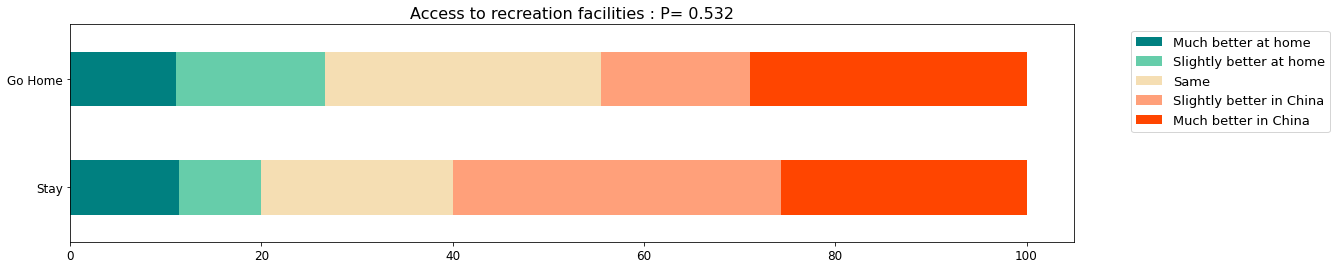

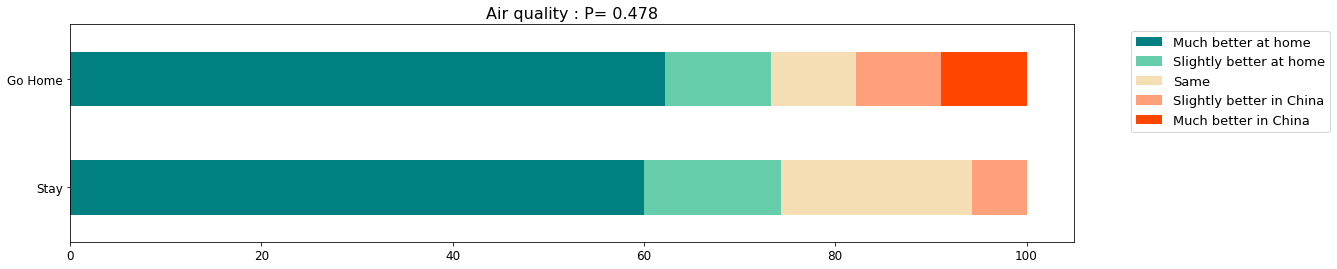

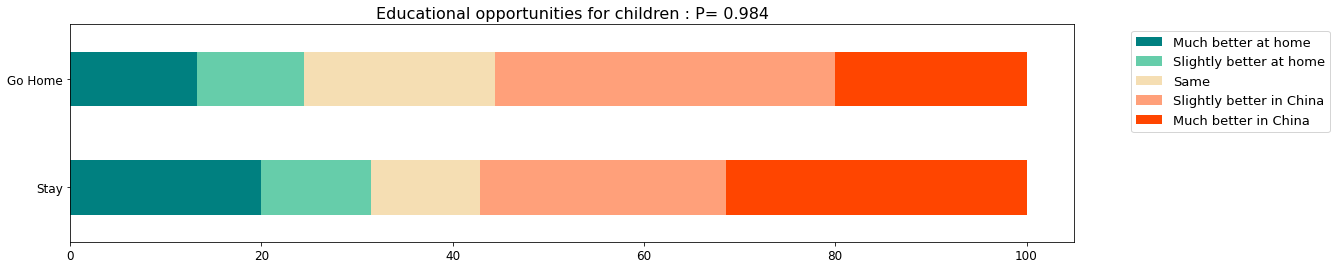

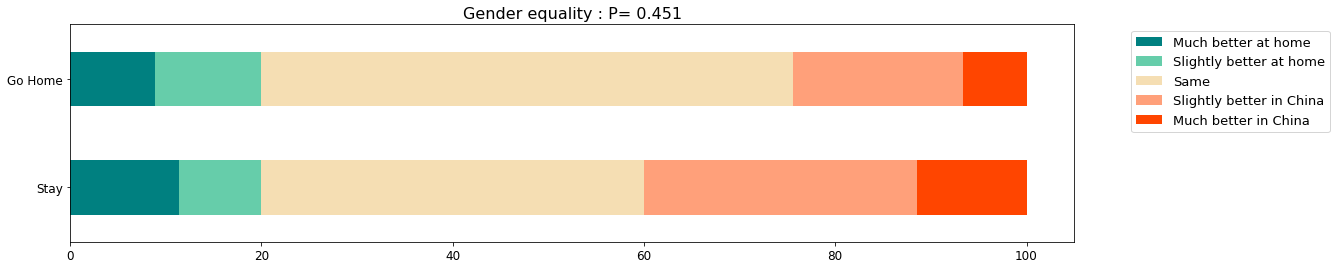

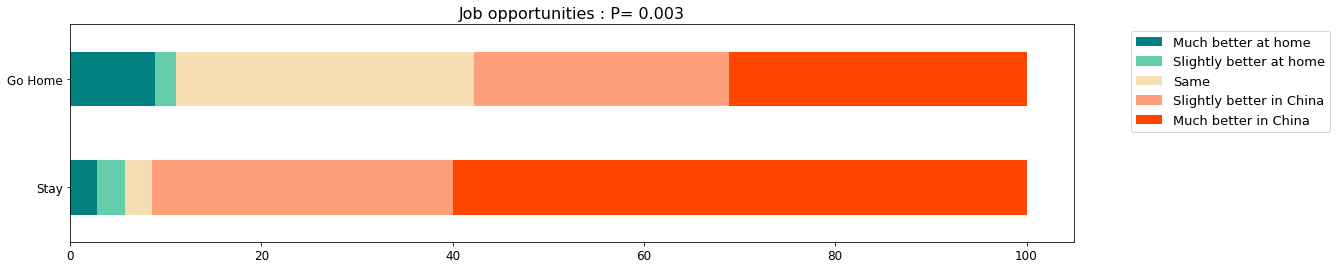

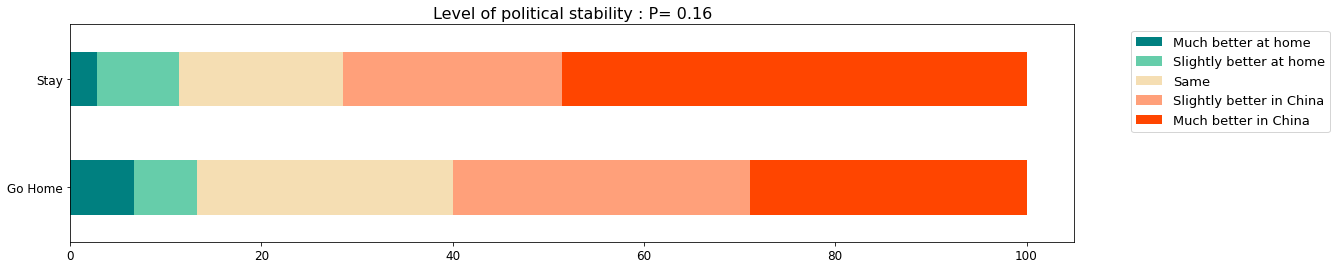

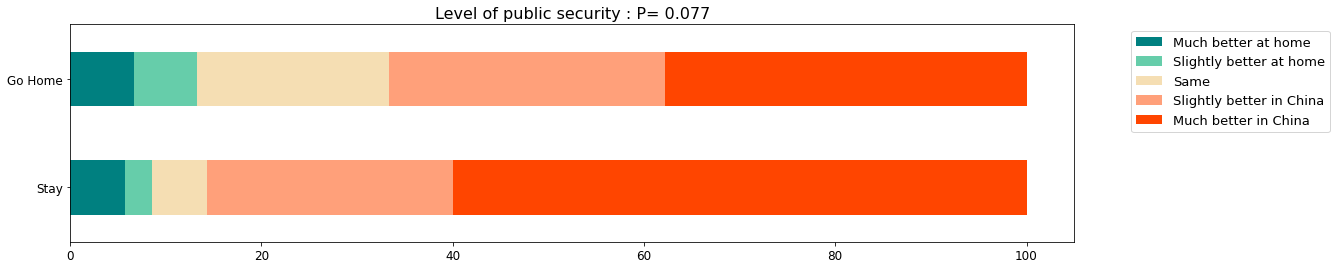

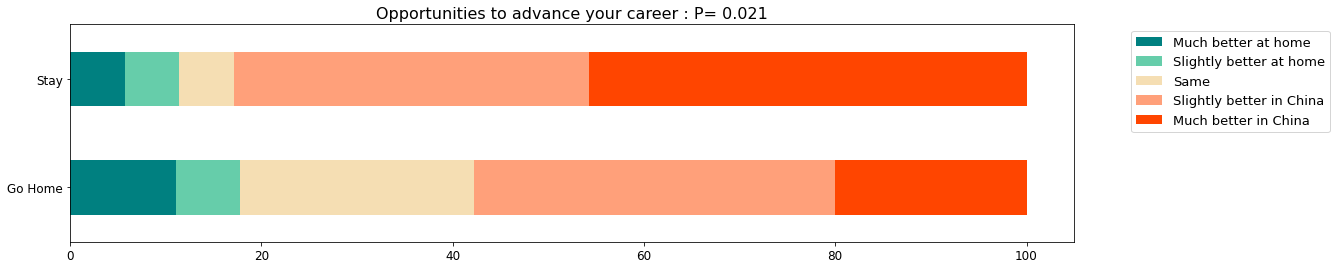

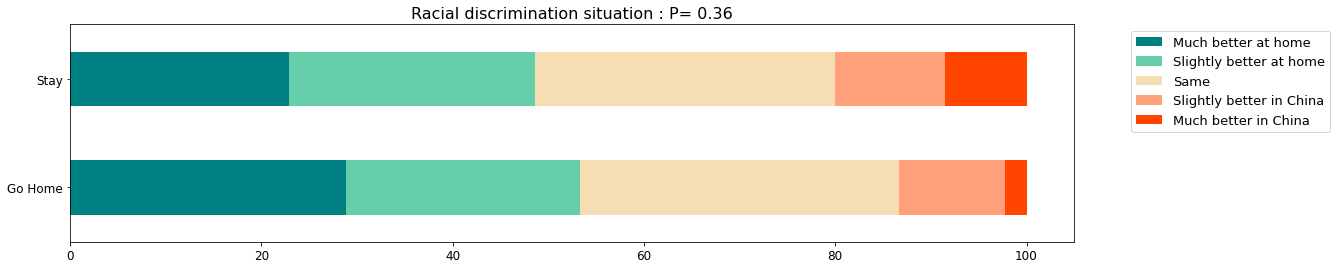

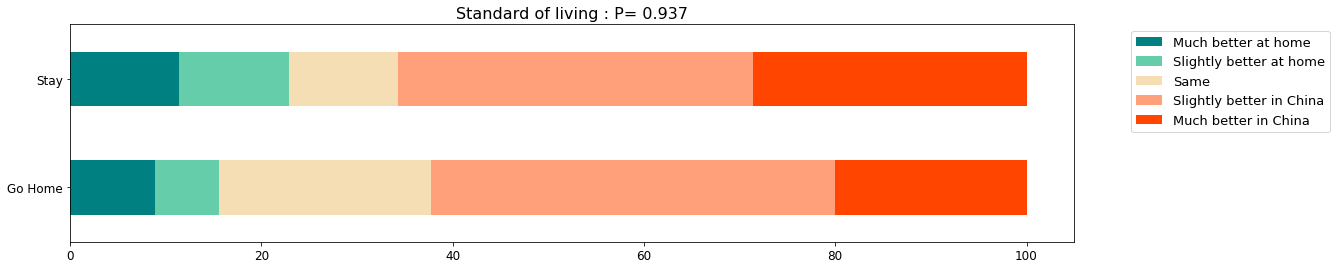

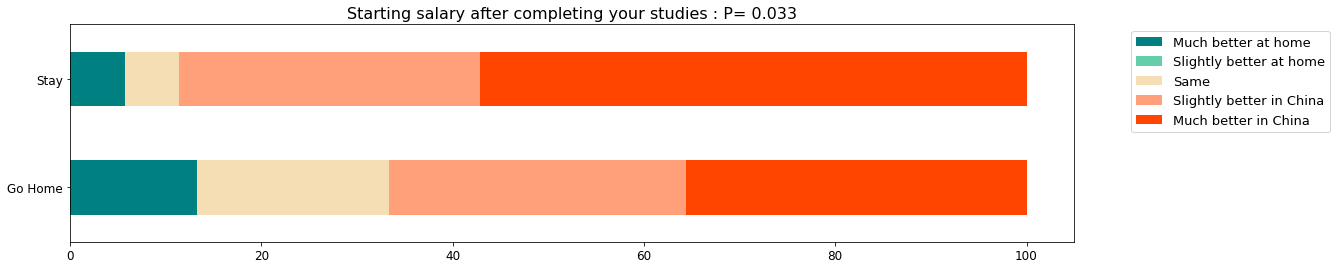

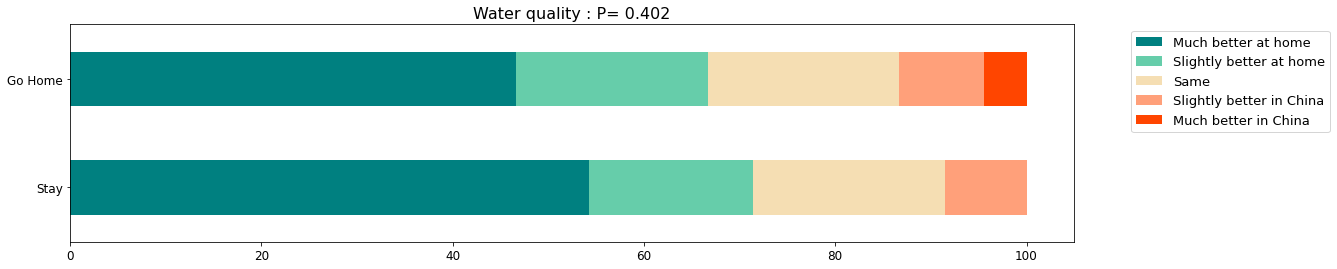

In [39]:
# make graph for every two rows
## get p values to add next to the titles of each Likert scale criterion graph 
ttest_p_value = pd.read_excel("ttest_p_value.xlsx", index_col = "Unnamed: 0")
ttest_p_value = ttest_p_value["P_values"]
ttest_p_value[0]

#visualize each criterion of Likert scale questions
colors = ['teal', 'mediumaquamarine', 'wheat', 'lightsalmon', 'orangered']
for i in concat_stayorleave_index:
    concat_stayorleave.loc[i].reset_index().set_index('StayOrLeave').plot(kind= "barh", stacked = True, figsize = (18, 4),color = colors, fontsize = 12)
    plt.title(f'{i}: P= {ttest_p_value[i]}', fontsize = 16)
    plt.legend(bbox_to_anchor = (1.05, 1), fontsize =13)
    plt.ylabel('')

## Visualize demographic questions and research questions
#### Below each group of 3 bar chart will be questions (ex: school names or degree levels)

In [40]:
# get the data of questions that are not Likert questions
notlikert_question = thesis.copy(deep=True)
notlikert_question = notlikert_question[['Do you plan to stay and work in China or go home after your graduation?',
       'What degree level are you enrolled in?',
       'Which year of the program are you in?', 'What is your gender?',
       'What is your primary source of funding for your education in Beihang?',
       'Have you signed a contract stating you must return to work in your home country after your graduation?',
       'Do you have any relatives living in China?',
       'Do you have relatives living in the country where your parents live, who can take care of your parents if they were to need assistance?',
       'Do you have a romantic partner?', 'Do you have pressure to return home after graduation from your family?',
       'Before you moved to China, did you plan to go home or stay in China after graduation?',
       'Is your plan now different from your initial plan before moving to China?',
        'Overall as a graduate student here, how would you rank your experience?', 
       'Do you have Chinese friends?']].tail(-1)
notlikert_question = notlikert_question.loc[notlikert_question['Do you plan to stay and work in China or go home after your graduation?'].isin(['Go home', 'Stay and work in China'])] 
notlikert_question.columns = ['Do you plan to stay and work in China or go home after your graduation?',
       'What degree level are you enrolled in?',
       'Which year of the program are you in?', 'What is your gender?',
       'What is your primary source of funding \n for your education in Beihang?',
       'Have you signed a contract stating\n you must return to work \n in your home country?',
       'Do you have any relatives living in China?',
       'Do you have relatives\n living in the country where your parents live \n who can take care of your parents\n if they were to need assistance?',
       'Do you have a romantic partner?',
       'Do you have pressure to return home\n after graduation from your family?',
       'Before you moved to China,\n did you plan to go home\n or stay in China after graduation?',
       'Is your plan now different from\n your initial plan before moving to China?',
       'Overall as a graduate student here,\n how would you rank your experience?',
       'Do you have Chinese friends?']


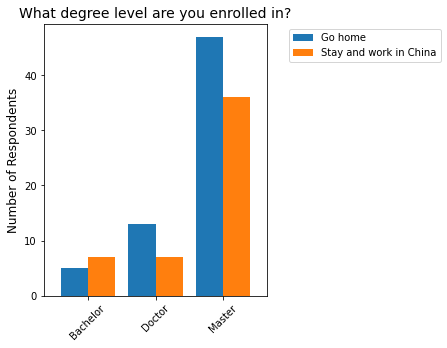

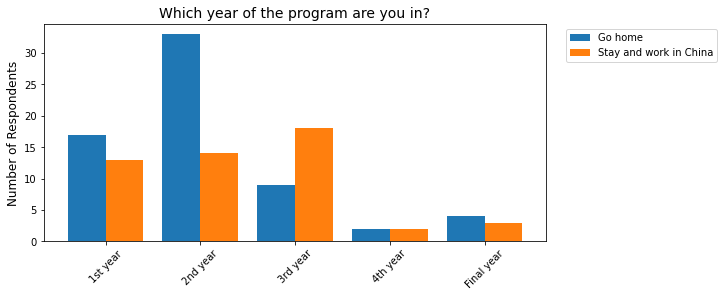

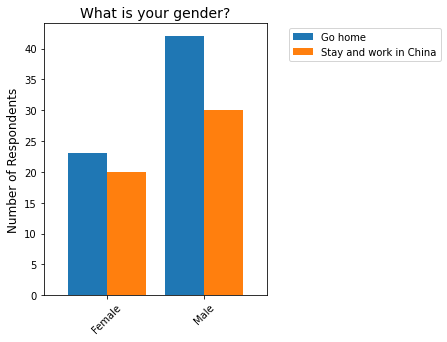

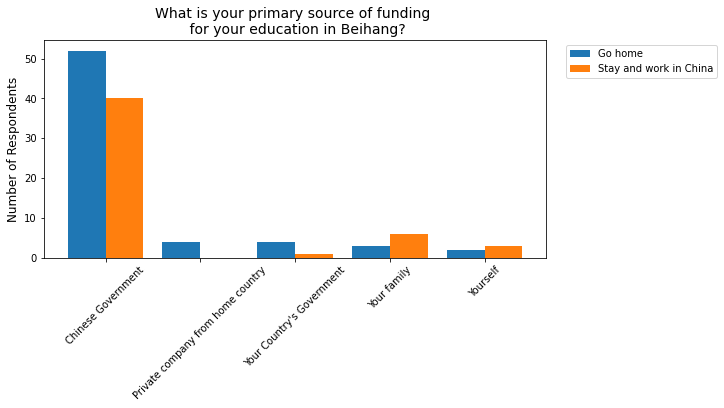

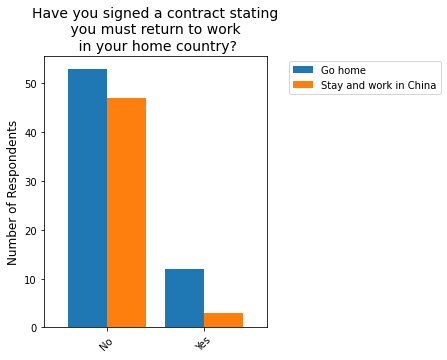

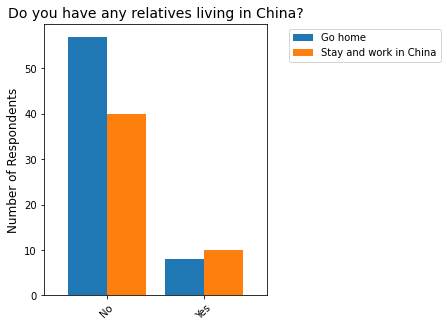

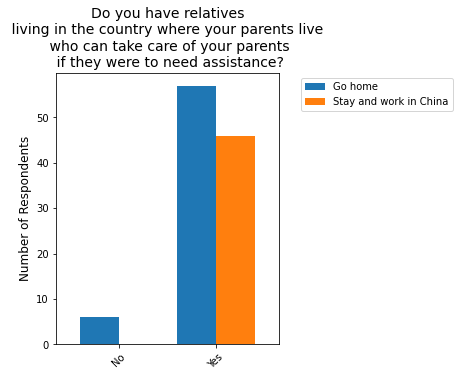

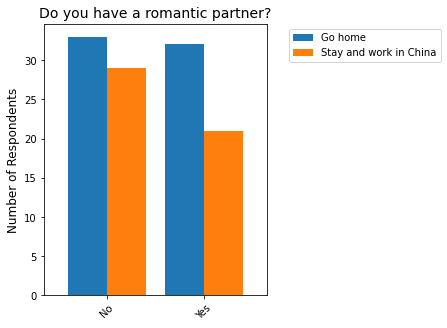

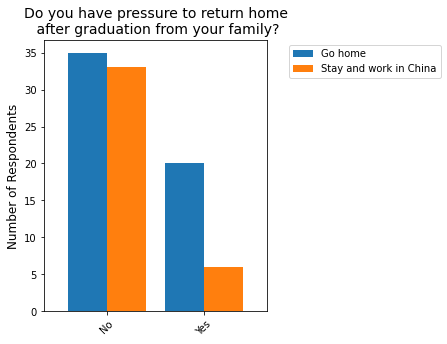

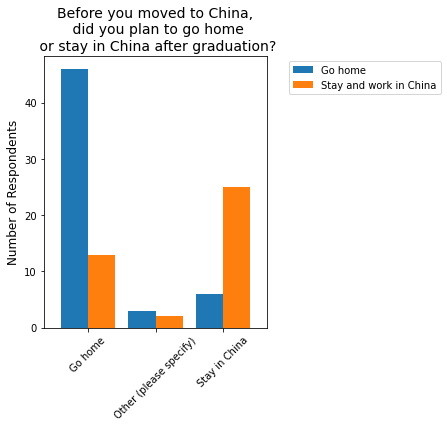

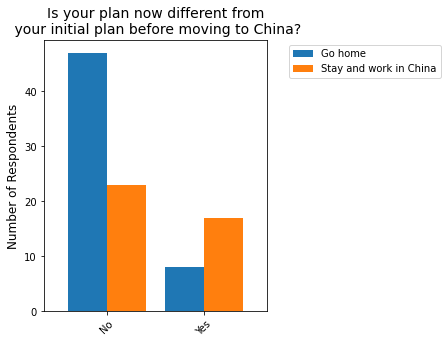

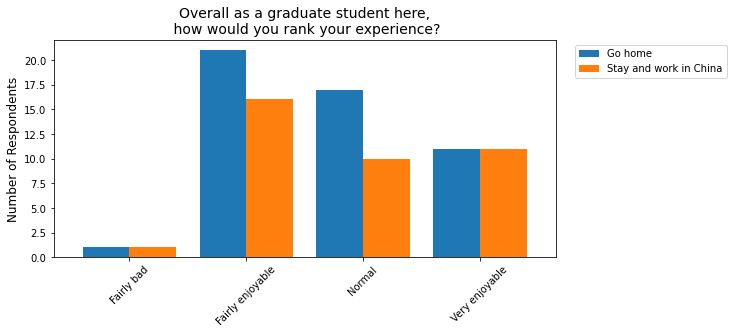

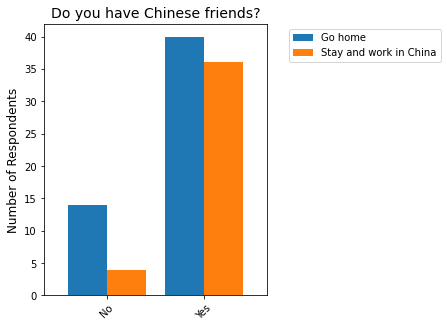

In [41]:
#run loops for all columns
## make sure all the bars have the same width
##(https://stackoverflow.com/questions/42555761/matplotlib-set-width-of-bars-to-be-the-same-size-for-all-subplots)
for i in range(1,len(notlikert_question.columns)):
        groupby_columns = notlikert_question.iloc[:, [0, i]].groupby(notlikert_question.columns[i]).value_counts().unstack().fillna(0)
        if notlikert_question.iloc[:, i].nunique() <=3:
            groupby_columns.plot.bar(rot=45, width = 0.8, align = 'center', figsize=(4,5))
            plt.legend(loc  = 'upper right', bbox_to_anchor = (1.8, 1))
            plt.ylabel("Number of Respondents", fontsize = 12)
            plt.xlabel("")
            plt.title(notlikert_question.columns[i], fontsize = 14)
            plt.show() 
        else:
            groupby_columns.plot.bar(rot=45, width = 0.8, align = 'center', figsize=(9,4))
            plt.legend(loc  = 'upper right', bbox_to_anchor = (1.35, 1))
            plt.ylabel("Number of Respondents", fontsize = 12)
            plt.xlabel("")
            plt.title(notlikert_question.columns[i], fontsize = 14)
            plt.show()

In [42]:
# visualize school, length of living in China, level of Chinese
other_questions = thesis.copy(deep=True)[['Do you plan to stay and work in China or go home after your graduation?',
                                          'What school are you enrolled at in Beihang?', 
                                          'What country do you regard as your home country?',
                                          'How long have you lived in China?',
                                          'How do you assess your current level of Chinese language?',
                                          'Where do your parents live?']].tail(-1)
other_questions = other_questions.loc[other_questions['Do you plan to stay and work in China or go home after your graduation?'].isin(['Go home', 'Stay and work in China'])] 

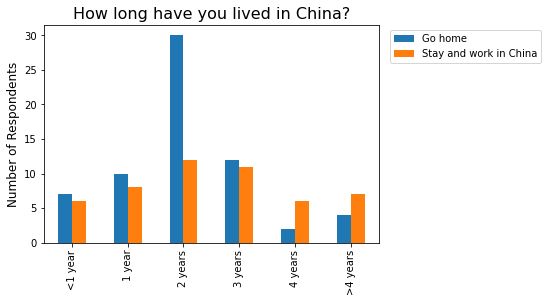

In [43]:
# visualize 'how long have you lived in China'
length_of_living = (other_questions[['Do you plan to stay and work in China or go home after your graduation?','How long have you lived in China?']]
                    .groupby(['How long have you lived in China?', 'Do you plan to stay and work in China or go home after your graduation?']))
length_of_living = length_of_living.value_counts().unstack()
#change order of the indexes column
length_of_living.index = pd.Categorical(length_of_living.index, ['<1 year', '1 year', '2 years', '3 years', '4 years', '>4 years'])
length_of_living= length_of_living.sort_index()
length_of_living.plot.bar()
plt.legend(bbox_to_anchor = (1.5, 1))
plt.title("How long have you lived in China?", fontsize = 16)
plt.ylabel("Number of Respondents", fontsize = 12)
plt.show()

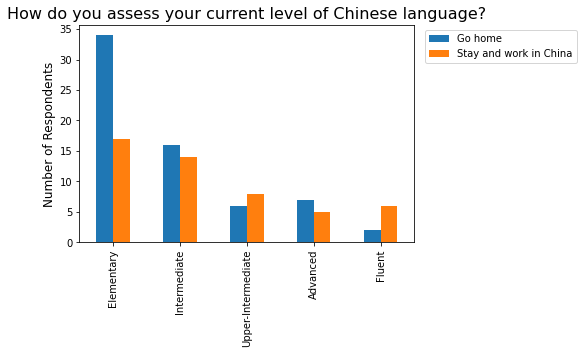

In [44]:
# visualize level of Chinese
level_of_chinese = other_questions[['Do you plan to stay and work in China or go home after your graduation?','How do you assess your current level of Chinese language?']]

level_of_chinese = (level_of_chinese.groupby(['How do you assess your current level of Chinese language?', 'Do you plan to stay and work in China or go home after your graduation?'])
                    .value_counts().unstack())
# rearrange indexes
level_of_chinese.index = pd.Categorical(level_of_chinese.index, ['Elementary', 'Intermediate', 'Upper-Intermediate', 'Advanced', 'Fluent'])
level_of_chinese= level_of_chinese.sort_index()
level_of_chinese.plot.bar()
plt.legend(bbox_to_anchor = (1.5, 1))
plt.title('How do you assess your current level of Chinese language?', fontsize = 16)
plt.ylabel("Number of Respondents", fontsize = 12)
plt.show()

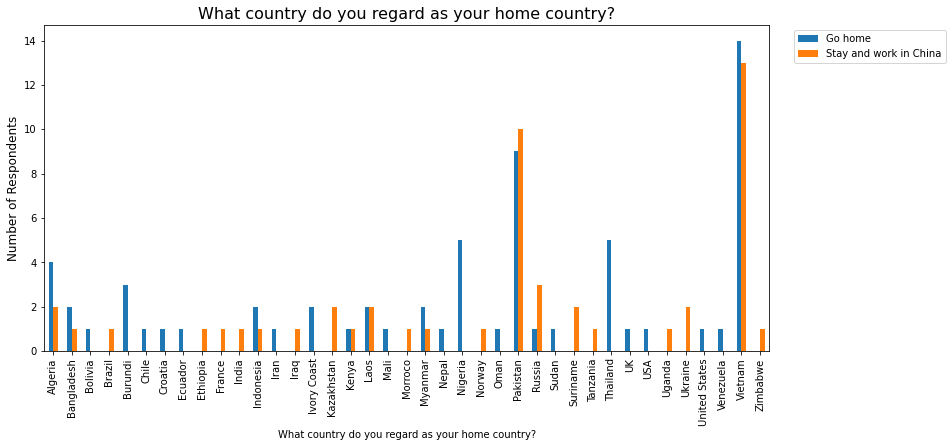

In [45]:
# visualize home country
home_country = other_questions[['Do you plan to stay and work in China or go home after your graduation?','What country do you regard as your home country?']]

home_country = (home_country.groupby(['What country do you regard as your home country?', 'Do you plan to stay and work in China or go home after your graduation?'])
                    .value_counts().unstack())
home_country.plot.bar(figsize = (13, 6))
plt.legend(bbox_to_anchor = (1.25, 1))
plt.title('What country do you regard as your home country?', fontsize = 16)
plt.ylabel("Number of Respondents", fontsize = 12)
plt.show()